##  __Problem #1 (100pts)__

#### In communications we often encode messages using orthogonal signals. In this problem, we will find such orthogonal set from a collection of symbols to later decode a message.

#### __i)__ Read the file symbols.npz and plot the signals $s_1, s_2, s_3, s_4 \in \mathbb{R}^N$ . What is the value of N

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a=np.load('signal.npz')
s1=a['s1']
s2=a['s2']
s3=a['s3']
s4=a['s4']
N=len(s1)
print('N es igual a', N)

N es igual a 101


In [3]:
x=np.arange(0,N)


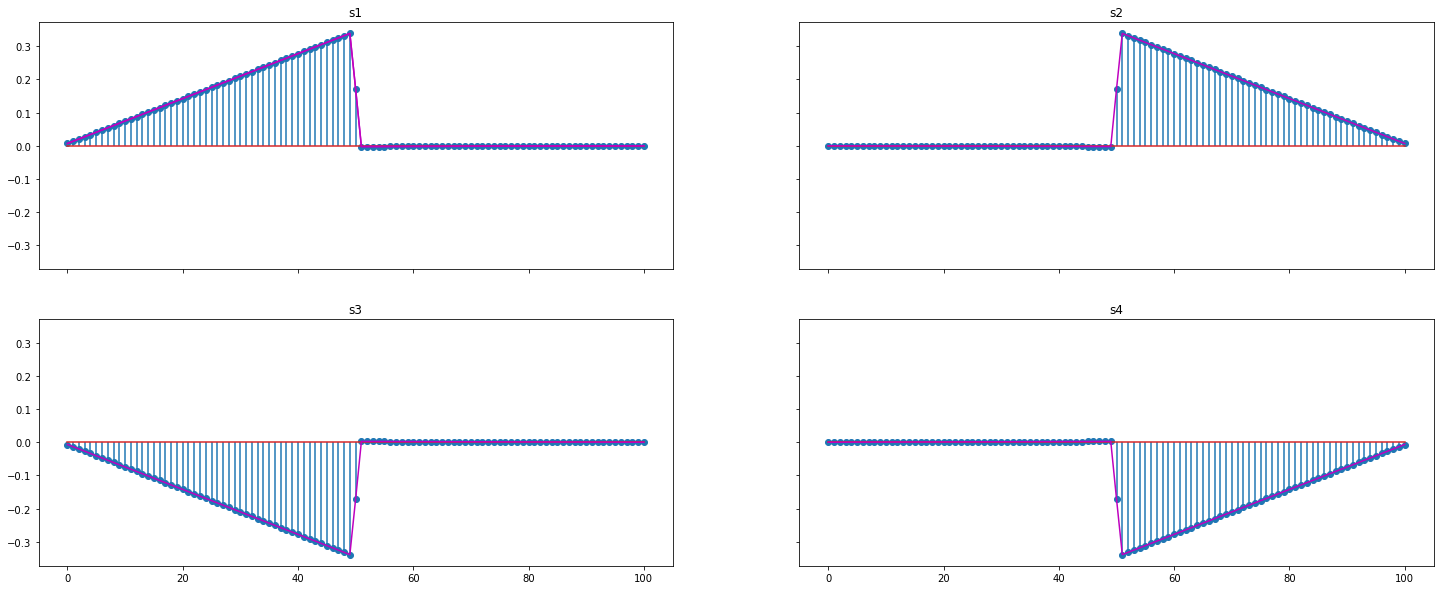

In [4]:
fig, axs = plt.subplots(2, 2,figsize=(25,10),sharex=True,sharey=True)
axs[0,0].stem(x,s1)
axs[0,0].plot(x,s1,c='m')
axs[0,0].set_title('s1')
axs[0,0].plot(x,s1,c='m')
axs[0,1].stem(x,s2)
axs[0,1].plot(x,s2,c='m')
axs[0,1].set_title('s2')
axs[1,0].stem(x,s3)
axs[1,0].plot(x,s3,c='m')
axs[1,0].set_title('s3')
axs[1,1].stem(x,s4)
axs[1,1].plot(x,s4,c='m')
axs[1,1].set_title('s4')
plt.show()

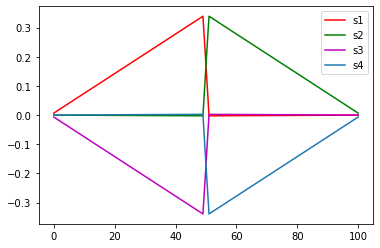

In [5]:
plt.plot(x,s1,c='r',label='s1')
plt.plot(x,s2,c='g',label='s2')
plt.plot(x,s3,c='m',label='s3')
plt.plot(x,s4,label='s4')
plt.legend()
plt.show()

#### __ii)__ What is the number M of orthogonal signals needed to represent $s_1, s_2, s_3$ and $s_4$? Justify your answer

In [32]:
list=[s1,s2,s3,s4]
for i in range(4):
    for j in range(4):
        if i !=j:
            #print(i,j)
            if abs(np.dot(list[i].T,list[j]))<0.0000005:
                #print(a)
                print('s'+str(i+1)+' es ortogonal a s'+str(j+1))

s1 es ortogonal a s2
s1 es ortogonal a s4
s2 es ortogonal a s1
s2 es ortogonal a s3
s3 es ortogonal a s2
s3 es ortogonal a s4
s4 es ortogonal a s1
s4 es ortogonal a s3


#### __iii)__ Use the qr function from numpy.linalg to find an orthonormal set of signals $\{\phi i\}^{M}_{ i=1}$ from the signals $s_1, s_2, s_3,s_4$. Hint: Create a matrix $$\pmb{S}=[s_1\quad s_2\quad s_3\quad s_4]$$ and then apply the QR decomposition to the matrix.

In [6]:
S=np.array([s1,s2,s3,s4])
S=S[:,:,0].T
S.shape

(101, 4)

In [7]:
phi1=np.linalg.qr(S)[0].T[0]
phi2=np.linalg.qr(S)[0].T[1]
phi3=np.linalg.qr(S)[0].T[2]
phi4=np.linalg.qr(S)[0].T[3]

In [8]:
np.dot(np.linalg.qr(S)[0].T,np.linalg.qr(S)[0])

array([[ 1.00000000e+00,  1.00736285e-18,  2.48969739e-16,
        -3.44380450e-19],
       [ 1.00736285e-18,  1.00000000e+00,  8.68022650e-19,
        -2.49716886e-16],
       [ 2.48969739e-16,  8.68022650e-19,  1.00000000e+00,
         4.30765188e-18],
       [-3.44380450e-19, -2.49716886e-16,  4.30765188e-18,
         1.00000000e+00]])

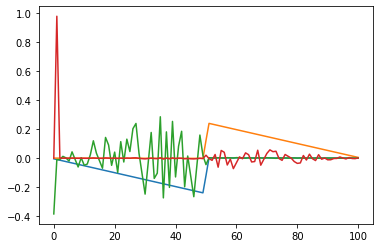

In [9]:
plt.plot(np.linalg.qr(S)[0])
plt.show()

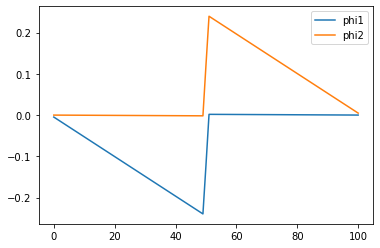

In [10]:
plt.plot(phi1,label='phi1')
plt.plot(phi2,label='phi2')
plt.legend()
plt.show()

#### __iv)__ Plot the signals $s_1$, $s_2$, $s_3$ and $s_4$ in the space defined by the base ${\phi_i}^M_{ i=1}$. This is also called the constellation diagram. Hint: In the basis ${\phi_i}^M_{i=1}$ the signals $s_i \in \mathbb{R}$ can be represented as a vector in $\mathbb{R}^M$. Use what we have seen about orthogonal projections.

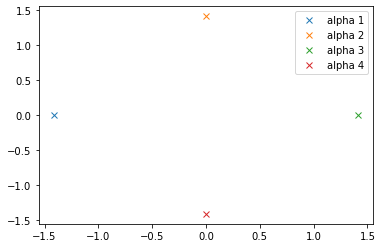

In [11]:
alpha1=np.dot(np.linalg.qr(S)[0][:,:2].T,s1)
alpha2=np.dot(np.linalg.qr(S)[0][:,:2].T,s2)
alpha3=np.dot(np.linalg.qr(S)[0][:,:2].T,s3)
alpha4=np.dot(np.linalg.qr(S)[0][:,:2].T,s4)
plt.plot(alpha1[0],alpha1[1],'x',label='alpha 1')
plt.plot(alpha2[0],alpha2[1],'x',label='alpha 2')
plt.plot(alpha3[0],alpha3[1],'x',label='alpha 3')
plt.plot(alpha4[0],alpha4[1],'x',label='alpha 4')
plt.legend()
plt.show()

In [12]:
np.linalg.qr(S)[0][:,:2].T.shape

(2, 101)

#### __v)__ Read the file message.npz. This file has 164 noisy symbols sent through the air and then received by an antenna. Plot the received messages in the constellation diagram. Determine regions of the constellation diagram that correspond to each symbol $s_i$.
.

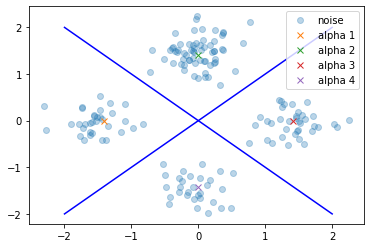

In [13]:
mes=np.load('message.npz')['M']
mes.shape
noise=np.dot(np.linalg.qr(S)[0][:,:2].T, mes.T)
noise[0]


plt.plot(noise[0],noise[1],'o',alpha=0.3,label='noise')
plt.plot(alpha1[0],alpha1[1],'x',label='alpha 1')
plt.plot(alpha2[0],alpha2[1],'x',label='alpha 2')
plt.plot(alpha3[0],alpha3[1],'x',label='alpha 3')
plt.plot(alpha4[0],alpha4[1],'x',label='alpha 4')
plt.plot([-2,2],[-2,2],c='b')
plt.plot([-2,2],[2,-2],c='b')

plt.legend()
plt.show()

#### __vi)__ Decode the message using Table 1. To convert from binary to text use an ASCII converter1

.

In [14]:
text=''
for i in np.arange(0,164):
    x=noise.T[i][0]
    y=noise.T[i][1]
    if y>x and y<-x: #s1 00
        text+='00'
    elif y>x and y>-x: #s2 01
        text+='01'
    elif y<x and y>-x: #s3 10
        text+='10'
    elif y<x and y<-x: #s4 11
        text+='11'
    else:
        print(i,'error')

In [15]:
text

'0100001101101111011011100110011101110010011000010111010001110101011011000110000101110100011010010110111101101110011100110010000100100000011110010110111101110101001000000110010001100101011000110110111101100100011001010110010000100000011101000110100001100101001000000110110101100101011100110111001101100001011001110110010100101110'

In [16]:
noise.shape

(2, 164)